# Simple Linear Regression from Scratch

## Introduction

#### Linear regression is one of the simplest and most widely used machine learning algorithms for predictive modeling. It assumes a linear relationship between the input features (X) and the target variable (y). Here, I build a linear regression model from scratch without relying on libraries like scikit-learn.

## Implementing the Linear Regression Model

#### I define a class MyLinearRegressor that encapsulates the logic for fitting the model and making predictions.

#### Key Steps:
* **Initialization**: Initialize the slope (m) and intercept (b) as None.
* **Fitting the Model (fit method)**:
    * Calculate the mean of the training data.
    * Compute the slope (m) and intercept (b) using the least squares method.
    * Print the learned parameters for transparency.
* **Making Predictions (predict method)**: Use the learned parameters to predict the target variable for new data.

In [2]:
class MyLinearRegressor:
    def __init__(self):
        self.m = None  # Slope
        self.b = None  # Intercept

    def fit(self, X_train, y_train):
        num = 0
        den = 0

        # Calculate the mean of X and y
        X_train_mean = X_train.mean()
        y_train_mean = y_train.mean()
        
        # Compute the slope (m) and intercept (b)
        for i in range(X_train.shape[0]):
            num += ((X_train[i] - X_train_mean) * (y_train[i] - y_train_mean))
            den += (X_train[i] - X_train_mean) ** 2

        self.m = num / den
        self.b = y_train_mean - (self.m * X_train_mean)

        print("Slope is: ", self.m)
        print("Intercept is: ", self.b)

    def predict(self, X_test):
        return (self.m * X_test) + self.b  # y = mx + b

In [3]:
!pip install numpy pandas

You should consider upgrading via the 'c:\users\hp\.pyenv\pyenv-win\versions\3.8.10\python.exe -m pip install --upgrade pip' command.


## Training and Testing the Model

#### Steps:
- **Load the Data**: Use a dataset containing CGPA and placement package information.
- **Split the Data**: Divide the dataset into training and testing sets.
- **Train the Model**: Fit the model on the training data.
- **Make Predictions**: Predict the target variable for the test set.

In [4]:
import numpy as np
import pandas as pd

In [5]:
# Load the dataset
df = pd.read_csv('placement.csv')

In [6]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [7]:
df.shape

(200, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [9]:
# Split into features (X) and target (y)
X = df.iloc[:, 0].values  # CGPA
y = df.iloc[:, 1].values  # Package

In [10]:
!pip install sklearn

You should consider upgrading via the 'c:\users\hp\.pyenv\pyenv-win\versions\3.8.10\python.exe -m pip install --upgrade pip' command.


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [13]:
X_train.shape

(160,)

In [14]:
y_train.shape

(160,)

In [15]:
X_test.shape

(40,)

In [16]:
y_test.shape

(40,)

In [17]:
# Initialize and train the model
lr = MyLinearRegressor()

In [18]:
lr.fit(X_train, y_train)

Slope is:  0.5868864004093516
Intercept is:  -1.1183445380587584


In [19]:
# Make predictions
y_pred = lr.predict(X_test)

In [20]:
y_pred

array([3.10723754, 2.53208887, 2.4616625 , 3.43589393, 2.53208887,
       3.24222142, 2.47340023, 2.30907204, 1.86890724, 3.48284484,
       4.3866499 , 2.9018273 , 2.83140094, 3.15418846, 2.6083841 ,
       3.53566462, 4.12841988, 3.44176279, 4.08733783, 1.65762814,
       3.26569687, 3.16005732, 3.9464851 , 2.95464708, 2.92530276,
       3.75868145, 1.56372631, 2.97812254, 2.0391043 , 1.88651383,
       2.71402366, 2.12713726, 2.95464708, 3.74107486, 2.94290935,
       3.5063203 , 3.69412395, 2.80205662, 3.6530419 , 3.22461482])

In [21]:
y_test

array([2.83, 2.14, 2.2 , 3.54, 2.87, 3.33, 2.76, 3.26, 1.86, 3.47, 4.02,
       3.44, 2.6 , 3.65, 2.73, 3.34, 3.65, 4.06, 4.62, 1.48, 3.34, 3.12,
       4.09, 3.57, 3.26, 3.51, 1.94, 3.09, 2.09, 2.01, 2.71, 2.55, 2.98,
       3.67, 3.09, 3.14, 3.39, 2.49, 3.6 , 2.88])

In [22]:
!pip install matplotlib seaborn

You should consider upgrading via the 'c:\users\hp\.pyenv\pyenv-win\versions\3.8.10\python.exe -m pip install --upgrade pip' command.


## Visualizing the Results

#### To evaluate the model, I plot the actual vs. predicted values. A perfect model would lie on the red dashed line (y = x).

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

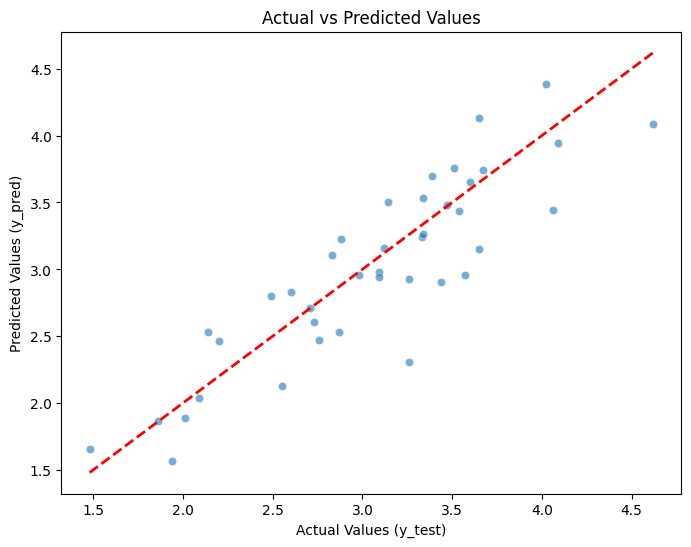

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Plot the ideal line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Values")
plt.show()

## Conclusion

#### In this project, I successfully implemented a simple linear regression model from scratch. This exercise helped me understand the underlying mathematics of linear regression and how least squares works to minimize the error.